# COVID-19 Italian Data

### Import

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Read Data

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/DavideMagno/ItalianCovidData/master/Daily_Covis19_Italian_Data_Cumulative.csv')

df.head()

,Date,Region,Hospitalised,In ICU,Home Isolation,Healed,Dead,Tests
0,2020-02-25,Lombardia,76,21,109,0,6,3298
1,2020-02-25,Veneto,14,5,18,0,1,2200
2,2020-02-25,Emilia Romagna,12,2,9,0,0,148
3,2020-02-25,Piemonte,2,0,1,0,0,141
4,2020-02-25,Lazio,1,1,0,1,0,124


### Data Manipulation

In [103]:
# group by date
df_g = df.groupby(['Date']).sum()
df_g.tail()

,Hospitalised,In ICU,Home Isolation,Healed,Dead,Tests
Date,,,,,,
2020-03-02,742,166,927,149,52,23345
2020-03-03,1034,229,1000,160,79,25856
2020-03-04,1346,295,1065,276,107,29837
2020-03-05,1790,351,1155,414,148,32362
2020-03-06,2394,462,1060,523,197,36359


### Plot

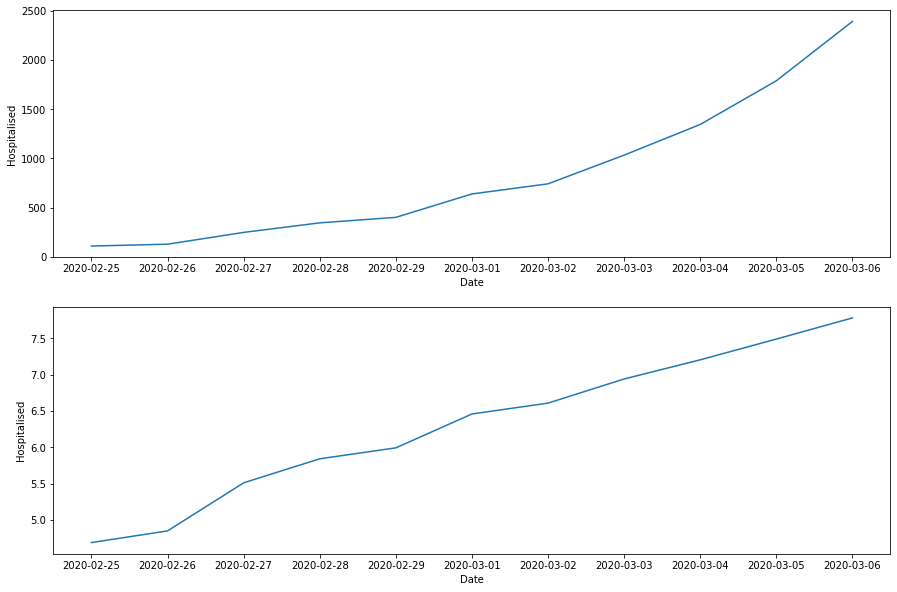

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.set_size_inches(15,10)

sns.lineplot(df_g.index, df_g.Hospitalised, ax=ax1)
sns.lineplot(df_g.index, df_g.Hospitalised.apply(lambda x: math.log(x)), ax=ax2)

### Exponential model

In [67]:
# From date to number

df_g.index = pd.to_datetime(df_g.index)
df_g['Date_n'] = df_g.index.to_julian_date()

In [68]:
# Normalize number and compute logs

df_g['Date_n'] = df_g.Date_n - 2458904.5
df_g['log_hosp'] = df_g.Hospitalised.apply(lambda x: math.log(x))

In [70]:
# Linear model is part of Gaussian family

model = sm.formula.glm("log_hosp ~ Date_n",
                       family=sm.families.Gaussian(), data=df_g).fit()

In [71]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            -13.8624
Link Function:      identity         BIC:            -21.4541
Dependent Variable: log_hosp         Log-Likelihood: 8.9312  
Date:               2020-03-07 17:05 LL-Null:        -361.10 
No. Observations:   11               Deviance:       0.12697 
Df Model:           1                Pearson chi2:   0.127   
Df Residuals:       9                Scale:          0.014107
Method:             IRLS                                     
--------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------
Intercept    4.7671    0.0670  71.1538  0.0000  4.6358  4.8984
Date_n       0.3080    0.0113  27.2003  0.0000  0.2858  0.3302
=============================================================

"""

In [77]:
# Calculate predicted data

log_predicted = np.array(model.predict(df_g['Date_n']))

exper = lambda t: math.exp(t)
vfunc = np.vectorize(exper)
predicted = vfunc(log_predicted)

Text(0, 0.5, 'log_hospitalized')

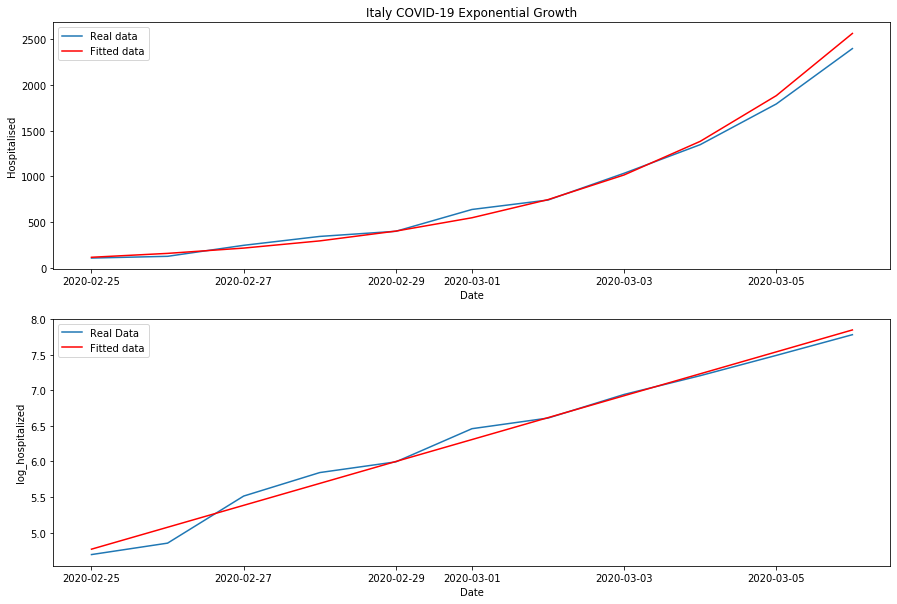

In [89]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.set_size_inches(15,10)

ax1.set_title('Italy COVID-19 Exponential Growth')

sns.lineplot(df_g.index, df_g.Hospitalised, ax=ax1, label='Real data')
sns.lineplot(x=df_g.index,y=predicted, color='red', ax=ax1, label='Fitted data')
sns.lineplot(df_g.index, df_g.Hospitalised.apply(lambda x: math.log(x)), ax=ax2, label='Real Data')
sns.lineplot(x=df_g.index,y=log_predicted, color='red', ax=ax2, label='Fitted data')
ax2.set_ylabel('log_hospitalized')

### Predict

In [99]:
# Try to see the future

df_predicted = pd.DataFrame(np.linspace(0,30), columns=['Date_n'])

In [100]:
log_predicted = np.array(model.predict(df_predicted['Date_n']))
predicted = vfunc(log_predicted)

Text(0, 0.5, 'log_hospitalized')

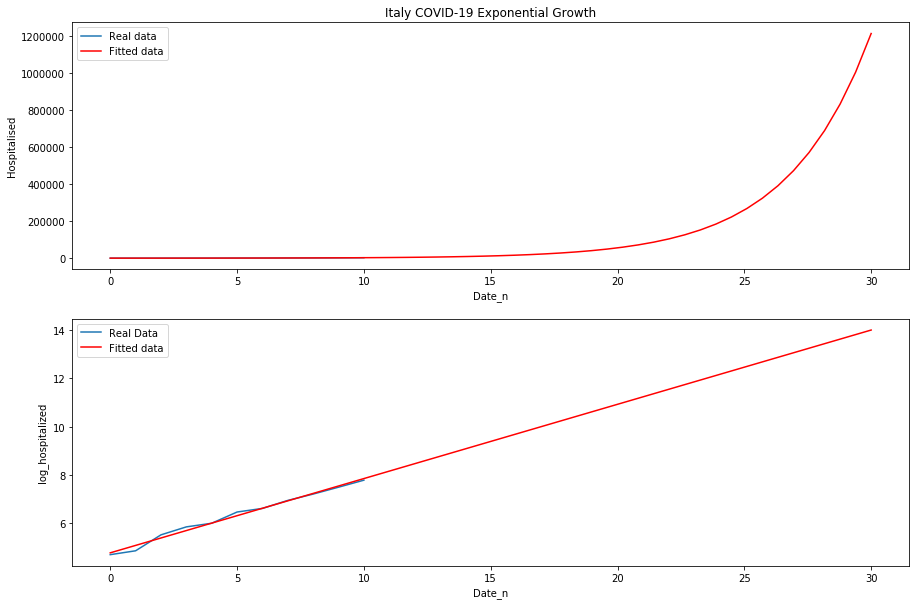

In [101]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.set_size_inches(15,10)

ax1.set_title('Italy COVID-19 Exponential Growth')

sns.lineplot(df_g.Date_n, df_g.Hospitalised, ax=ax1, label='Real data')
sns.lineplot(x=df_predicted.Date_n,y=predicted, color='red', ax=ax1, label='Fitted data')
sns.lineplot(df_g.Date_n, df_g.Hospitalised.apply(lambda x: math.log(x)), ax=ax2, label='Real Data')
sns.lineplot(x=df_predicted.Date_n,y=log_predicted, color='red', ax=ax2, label='Fitted data')
ax2.set_ylabel('log_hospitalized')